In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# loading data 
data = pd.read_csv("C:\\Users\\nthambat\\Downloads\\books.csv",index_col=0)
data.head()

,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6


In [45]:
data['User.ID'].unique()

array([276726, 276729, 276736, ..., 162113, 162121, 162129], dtype=int64)

In [46]:
data['Book.Title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'How to Flirt: A Practical Guide', 'Twilight',
       'Kids Say the Darndest Things'], dtype=object)

In [47]:
data['Book.Rating'].unique()

array([ 5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english") 

In [49]:
data["Book.Title"].isnull().sum() 

0

In [50]:
data["Book.Rating"].isnull().sum() 

0

In [51]:
tfidf_matrix = tfidf.fit_transform(data['Book.Title']) 

In [52]:
tfidf_matrix.shape

(10000, 11435)

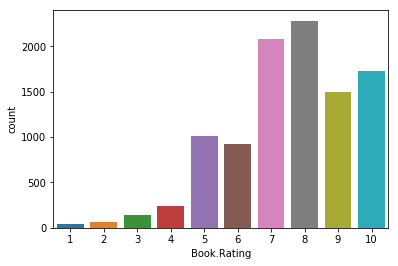

In [53]:

import seaborn as sns
sns.countplot(data['Book.Rating'])
plt.show()

In [54]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim_matrix = linear_kernel(tfidf_matrix,tfidf_matrix)

In [58]:
book_index = pd.Series(data.index,index=data['Book.Title']).drop_duplicates()

In [59]:
book_index['Decision in Normandy']

3

In [60]:
book_index['The Mummies of Urumchi']

5

In [61]:
def get_book_recommendations(Name,topN):
    #topN = 10
    # Getting the book index using its title 
    book_id = book_index[Name]
    # Getting the pair wise similarity score for all the anime's with that 
    # anime
    cosine_scores = list(enumerate(cosine_sim_matrix[book_id]))
    # Sorting the cosine_similarity scores based on scores 
    cosine_scores = sorted(cosine_scores,key=lambda x:x[1],reverse = True)
    # Get the scores of top 10 most similar book's 
    cosine_scores_10 = cosine_scores[0:topN+1]
    # Getting the book index 
    book_idx  =  [i[0] for i in cosine_scores_10]
    book_scores =  [i[1] for i in cosine_scores_10]
    # Similar movies and scores
    book_similar_show = pd.DataFrame(columns=["Book.Title","Book.Rating"])
    book_similar_show["Book.Title"] = data.loc[book_idx,"Book.Title"]
    book_similar_show["Book.Rating"] = book_scores
    book_similar_show.reset_index(inplace=True)  
    book_similar_show.drop(["index"],axis=1,inplace=True)
    print (book_similar_show)
    #return (anime_similar_show)

In [63]:
get_book_recommendations("The Mummies of Urumchi",topN=5)

                                          Book.Title  Book.Rating
0                             The Mummies of Urumchi     1.000000
1  Chicken Soup for the Mother's Soul (Chicken So...     1.000000
2                           Man's Search For Meaning     0.801084
3                                           Shopgirl     0.624005
4                                    The Corrections     0.465029
5  Secret Ceremonies: A Mormon Woman's Intimate D...     0.450221
